#### Spatial data analysis with numerical methods
#### Professor Doctor Rheinwalt
##### Winter semester 2020

##### Mozhdeh Davoodifard


# 2017's  monster hurricanes 
#  Harvey, Irma and Maria among five costliest ever

#### The three big hurricanes of 2017 — Harvey, Irma and Maria — are now three of the five costliest hurricanes in U.S. history, the National Oceanic and Atmospheric Administration (NOAA) announced on Dec 2019. Hurricane Maria ranks third at 90 billion, and Irma ranks fifth at $50 billion. With damages of 70 billion, 2012's Sandy has been pushed down to fourth place. Sandy was popularly labeled a "superstorm" as it neared landfall despite being a hurricane for nearly its entire life cycle.
#### According to National Hurricane Center, storms have fall into 5 categories considering the wind speed. Category 4 and 5 are the major and most destructive ones, with a wind speed > 130 MPH. Here I aim to plot these categories during year 2017 in United states. 

<img src="Irma.JPG" style="width:450px;height:350px;float: centre"/>

In [8]:
from geopandas import *
import numpy as np
import pandas as pd
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'Pandoc'

In [2]:
# Read data:
#data: http://flhurricane.com/cyclone/stormlist.php

Storms = pd.read_csv('C:/Users/Mozhdeh/Documents/hurricane data/2017_storm.csv')
Storms.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,Received,Forecaster
0,7,4/21/2017 4:00,39.4,-44.2,50,993,NW at 28 MPH,Tropical Storm,Arlene,4/20/2017 22:44,Beven
1,7A,6/20/2017 13:00,11.1,-63.6,45,1008,WNW at 21 MPH,Tropical Storm,Bret,6/20/2017 7:49,Avila
2,6,6/21/2017 4:00,26.4,-91.0,60,997,NW at 7 MPH,Tropical Storm,Cindy,6/20/2017 23:10,Stewart
3,1,7/6/2017 4:00,12.8,-38.4,30,1009,WNW at 14 MPH,Tropical Depression,Four,7/5/2017 22:34,Beven
4,3,7/18/2017 10:00,11.5,-56.2,50,1007,W at 18 MPH,Tropical Storm,Don,7/18/2017 4:36,Stewart


In [3]:
# Removing unused features:
hurricane = Storms.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
hurricane.head()

,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name
0,4/21/2017 4:00,39.4,-44.2,50,993,NW at 28 MPH,Tropical Storm,Arlene
1,6/20/2017 13:00,11.1,-63.6,45,1008,WNW at 21 MPH,Tropical Storm,Bret
2,6/21/2017 4:00,26.4,-91.0,60,997,NW at 7 MPH,Tropical Storm,Cindy
3,7/6/2017 4:00,12.8,-38.4,30,1009,WNW at 14 MPH,Tropical Depression,Four
4,7/18/2017 10:00,11.5,-56.2,50,1007,W at 18 MPH,Tropical Storm,Don


#### I need to know which storms had a wind speed of >130 MPH to remove small storms and plot only major ones(hurricanes category 4 and 5).

In [7]:
# Finding Hurricanes with a wind speed of > 130 MPH:

hurricane = Storms.loc[Storms["Wind"] >= 130]
print(hurricane)

   AdvisoryNumber            Date   Lat  Long  Wind  Pres       Movement  \
8             22S  8/26/2017 0:00  27.7 -96.7   130   941    NW at 8 MPH   
10            26A  9/5/2017 19:00  16.9 -59.1   185   926    W at 14 MPH   
11             15   9/9/2017 4:00  16.9 -59.3   155   938  WNW at 14 MPH   
14            15A  9/20/2017 1:00  17.0 -64.2   175   909  WNW at 10 MPH   

   stormtypeName    Name         Received  Forecaster  
8      Hurricane  Harvey  8/25/2017 19:08       Blake  
10     Hurricane    Irma   9/5/2017 13:44       Brown  
11     Hurricane    Jose   9/8/2017 22:44  Cangialosi  
14     Hurricane   Maria  9/19/2017 19:58       Brown  


In [8]:
# Harvey:
harvey_hu = pd.read_csv('C:/Users/Mozhdeh/Documents/hurricane data/Harvey.csv')
harvey = harvey_hu.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/17/2017 14:00,13.1,54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine
1,08/17/2017 17:00,13.0,55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey
2,08/17/2017 20:00,12.9,56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey
3,08/17/2017 23:00,13.0,57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey
4,08/18/2017 02:00,13.0,58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey


In [13]:
harvey.describe()

,Lat,Long,Wind,Pres
count,70.000000,70.000000,70.000000,70.000000
mean,24.181429,88.062857,59.214286,988.685714
std,6.166889,14.094507,29.704288,20.485090
min,12.900000,54.100000,35.000000,938.000000
25%,21.625000,92.500000,40.000000,982.500000
50%,27.350000,94.300000,45.000000,997.000000
75%,28.775000,96.575000,73.750000,1003.750000
max,31.700000,97.700000,130.000000,1007.000000


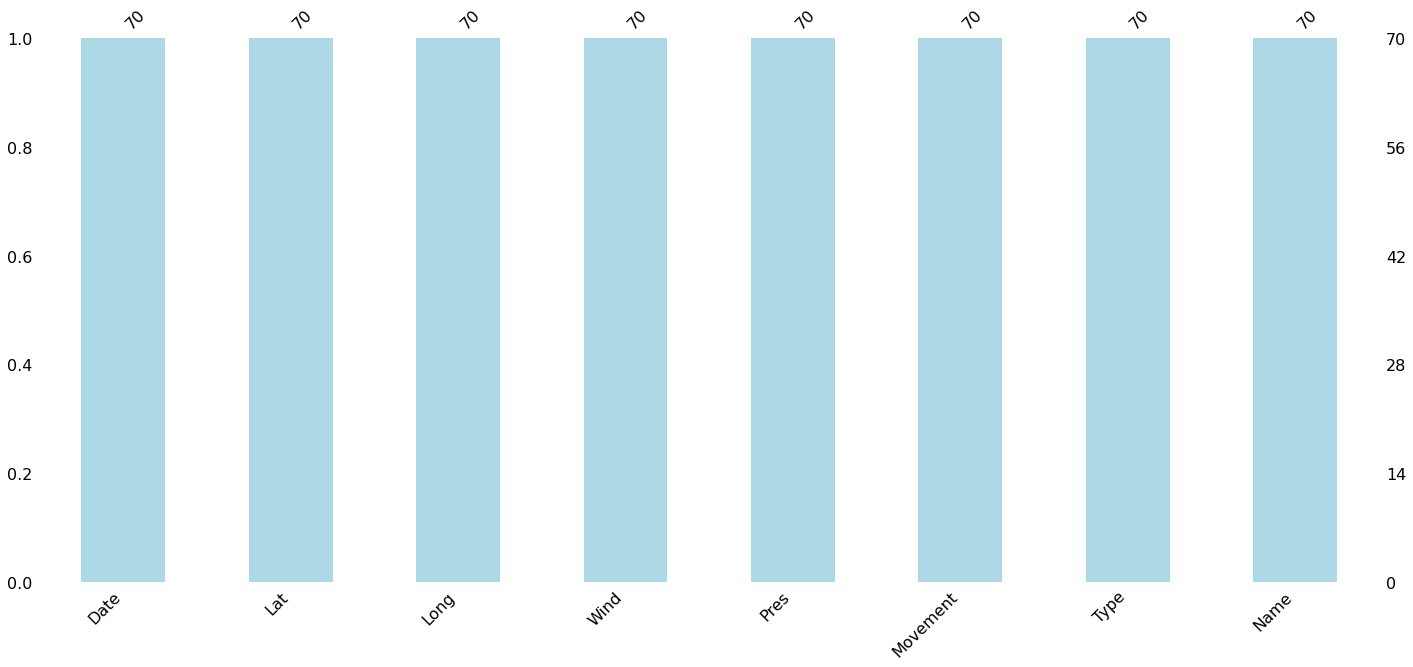

In [17]:
# Checking missing values:
msn.bar(harvey, color='lightblue');

In [10]:
# Irma:
irma_hu = pd.read_csv('C:/Users/Mozhdeh/Documents/hurricane data/Irma.csv')
irma = irma_hu.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
irma.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2017 11:00,16.4,30.3,50,1004,W at 13 MPH (280 deg),Tropical Storm,Irma
1,08/30/2017 17:00,16.4,31.2,60,1001,W at 15 MPH (275 deg),Tropical Storm,Irma
2,08/30/2017 23:00,16.4,32.2,65,999,W at 12 MPH (275 deg),Tropical Storm,Irma
3,08/31/2017 05:00,16.5,32.9,70,997,W at 12 MPH (280 deg),Tropical Storm,Irma
4,08/31/2017 11:00,16.9,33.8,100,979,WNW at 10 MPH (290 deg),Hurricane,Irma


In [14]:
irma.describe()

,Lat,Long,Wind,Pres
count,84.000000,84.000000,84.000000,84.000000
mean,20.740476,63.628571,131.726190,944.988095
std,4.237529,16.337986,39.950979,24.593316
min,16.400000,30.300000,35.000000,914.000000
25%,17.275000,52.100000,113.750000,925.000000
50%,19.100000,65.750000,127.500000,937.500000
75%,22.650000,79.650000,167.500000,967.000000
max,32.400000,84.900000,185.000000,1004.000000


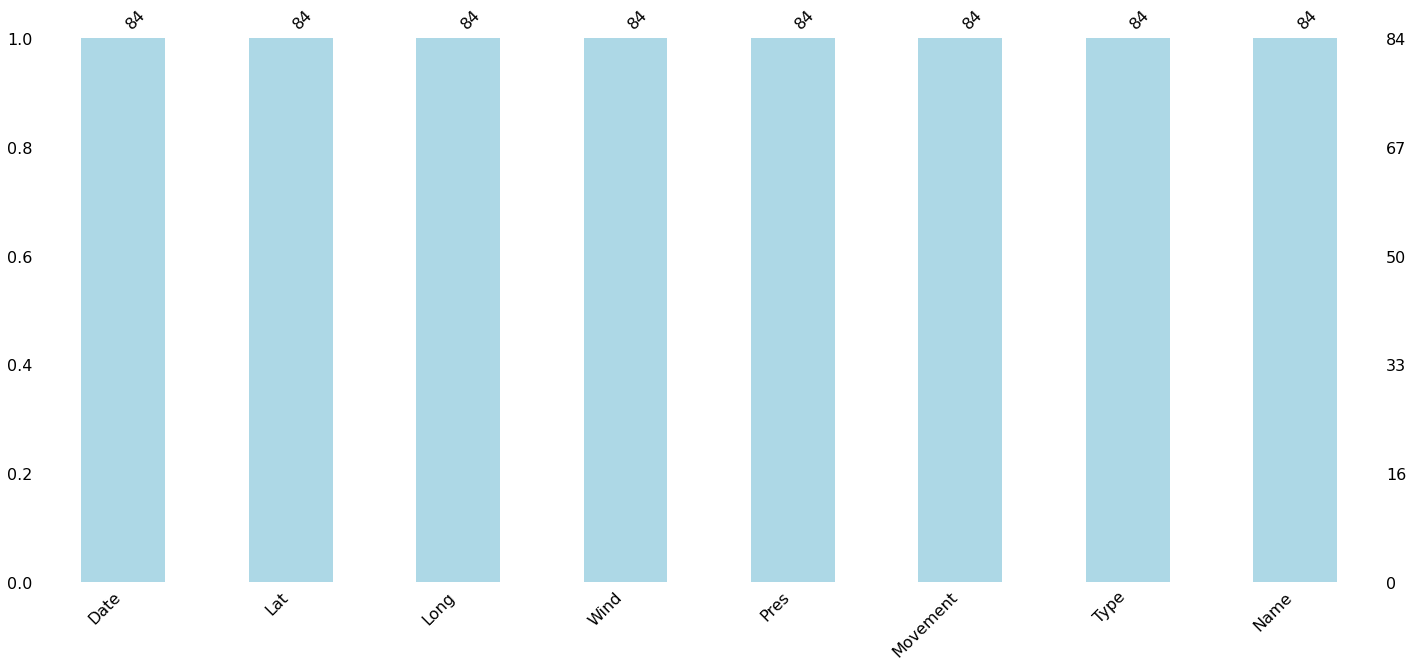

In [18]:
# Checking missing values:
msn.bar(irma, color='lightblue');

In [11]:
# Jose:
jose_hu = pd.read_csv('C:/Users/Mozhdeh/Documents/hurricane data/Jose.csv')
jose = jose_hu.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
jose.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,09/05/2017 11:00,12.3,39.1,40,1008,WNW at 13 MPH (290 deg),Tropical Storm,Jose
1,09/05/2017 17:00,12.5,40.6,45,1006,W at 12 MPH (280 deg),Tropical Storm,Jose
2,09/05/2017 23:00,12.3,41.7,50,1004,W at 14 MPH (270 deg),Tropical Storm,Jose
3,09/06/2017 05:00,12.5,42.8,60,1002,W at 13 MPH (275 deg),Tropical Storm,Jose
4,09/06/2017 11:00,13.1,44.5,70,998,WNW at 17 MPH (285 deg),Tropical Storm,Jose


In [15]:
jose.describe()

,Lat,Long,Wind,Pres
count,102.000000,102.000000,102.000000,102.000000
mean,27.620588,64.872549,87.696078,973.921569
std,9.170922,8.154221,30.971654,17.186044
min,12.300000,39.100000,40.000000,938.000000
25%,18.900000,62.025000,70.000000,967.000000
50%,27.250000,68.150000,75.000000,976.000000
75%,36.800000,70.725000,105.000000,986.000000
max,39.800000,72.200000,155.000000,1008.000000


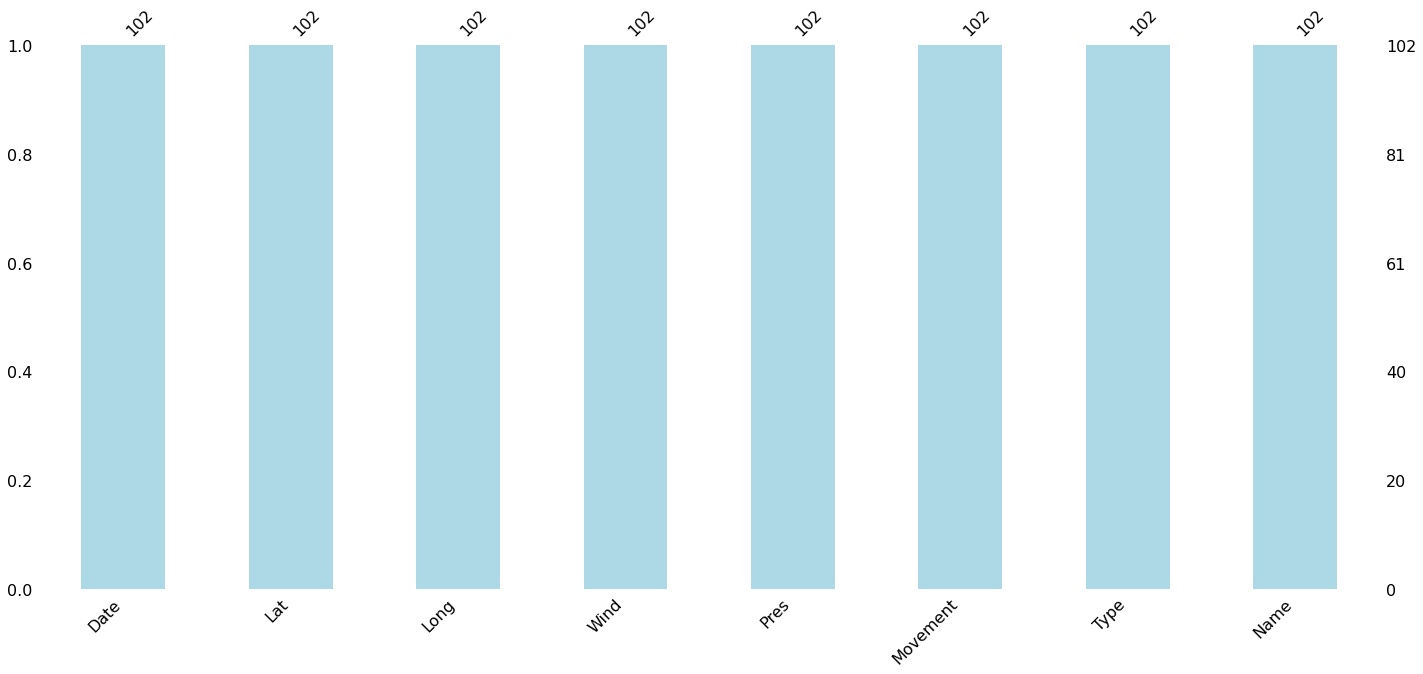

In [19]:
# Checking missing values:
msn.bar(jose, color='lightblue');

In [12]:
# Maria:
maria_hu = pd.read_csv('C:/Users/Mozhdeh/Documents/hurricane data/Maria.csv')
maria = maria_hu.drop(['AdvisoryNumber', 'Received', 'Forecaster'], axis=1)
maria.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,09/16/2017 11:00,12.2,50.5,35,1008,W at 22 MPH (280 deg),Potential Tropical Cyclone,Fifteen
1,09/16/2017 14:00,11.9,51.6,35,1006,W at 20 MPH (280 deg),Tropical Depression,FIFTEEN
2,09/16/2017 17:00,12.3,52.6,50,1002,W at 20 MPH (275 deg),Tropical Storm,Maria
3,09/16/2017 20:00,12.4,53.0,50,1002,W at 19 MPH (275 deg),Tropical Storm,Maria
4,09/16/2017 23:00,12.5,53.7,50,1002,W at 16 MPH (280 deg),Tropical Storm,Maria


In [16]:
maria.describe()

,Lat,Long,Wind,Pres
count,98.000000,98.000000,98.000000,98.000000
mean,24.611224,66.127551,98.622449,963.755102
std,8.946380,7.366919,35.024149,22.852761
min,11.900000,43.900000,35.000000,909.000000
25%,16.375000,60.800000,70.000000,952.250000
50%,22.550000,68.900000,90.000000,961.000000
75%,33.200000,72.575000,125.000000,979.000000
max,42.000000,73.200000,175.000000,1008.000000


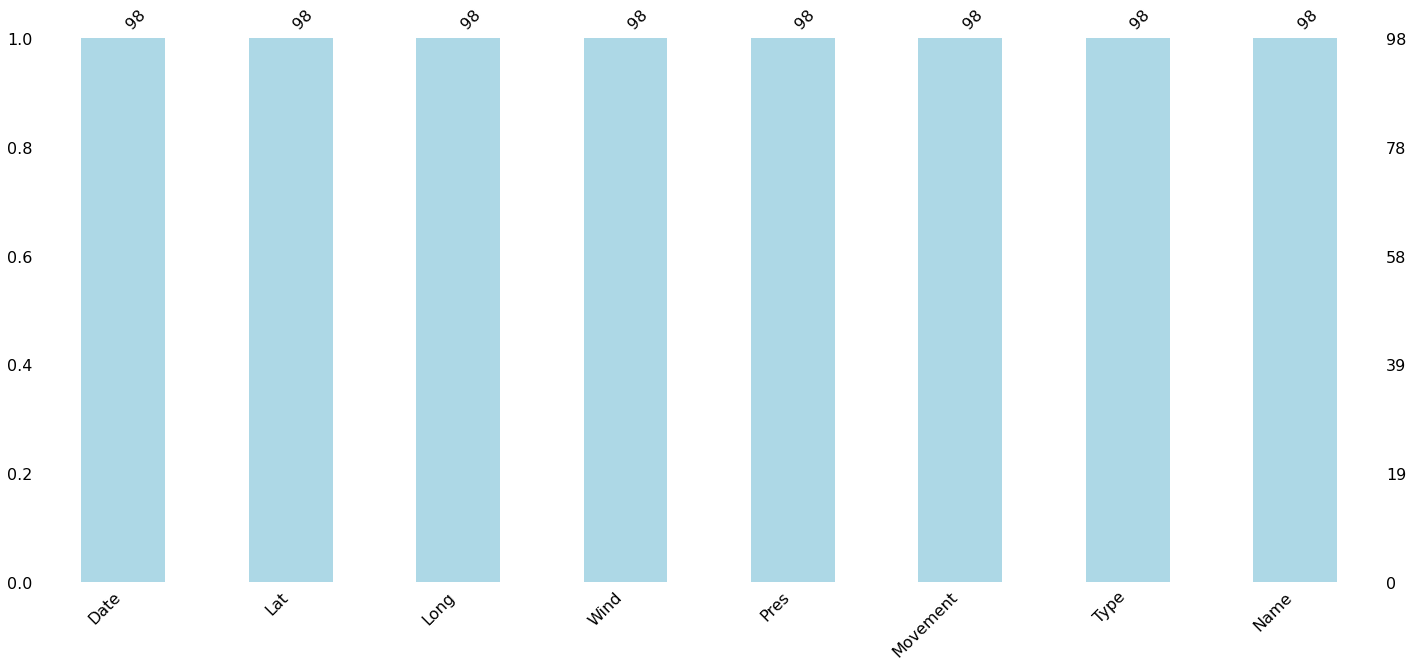

In [20]:
# Checking missing values:
msn.bar(maria, color='lightblue');

#### We have no missing data.

# Wind scale

#### Acording to Saffir-Simpson Hurricane Wind Scale, Catastrophic damage will occur: A high percentage of framed homes will be destroyed, with total roof failure and wall collapse. Fallen trees and power poles will isolate residential areas. Power outages will last for weeks to possibly months. Most of the area will be uninhabitable for weeks or months.

In [21]:
ls = [(harvey, "Harvey"), (irma, "Irma"), (jose, "Jose"), (maria, "Maria")]

for item in ls:
    print(f"Mean wind speed of {item[1]} is {round(item[0].Wind.mean())} mph and it can go up to {item[0].Wind.max()} mph maximum.")

Mean wind speed of Harvey is 59.0 mph and it can go up to 130 mph maximum.
Mean wind speed of Irma is 132.0 mph and it can go up to 185 mph maximum.
Mean wind speed of Jose is 88.0 mph and it can go up to 155 mph maximum.
Mean wind speed of Maria is 99.0 mph and it can go up to 175 mph maximum.


# Coordinates

#### It is important to check on the longitude and latitude. Here the longitude is west, we need to add "-" in front of the number to correctly plot the data. Then we can combine Lattitude and Longitude to create hurricane coordinates, which will subsequently be turned into GeoPoint for visualization purpose.

In [67]:
# Harvey coordinates:
harvey['Long'] = 0 - harvey['Long']
harvey['coordinates'] = harvey[['Long', 'Lat']].values.tolist()
harvey['coordinates'] = harvey['coordinates'].apply(Point)
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/17/2017 14:00,13.1,54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine,POINT (54.10000 13.10000)
1,08/17/2017 17:00,13.0,55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (55.80000 13.00000)
2,08/17/2017 20:00,12.9,56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (56.50000 12.90000)
3,08/17/2017 23:00,13.0,57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (57.40000 13.00000)
4,08/18/2017 02:00,13.0,58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey,POINT (58.10000 13.00000)


In [23]:
# Irma coordinates:
irma['Long'] = 0 - irma['Long']
irma['coordinates'] = irma[['Long', 'Lat']].values.tolist()
irma['coordinates'] = irma['coordinates'].apply(Point)
irma.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2017 11:00,16.4,-30.3,50,1004,W at 13 MPH (280 deg),Tropical Storm,Irma,POINT (-30.3 16.4)
1,08/30/2017 17:00,16.4,-31.2,60,1001,W at 15 MPH (275 deg),Tropical Storm,Irma,POINT (-31.2 16.4)
2,08/30/2017 23:00,16.4,-32.2,65,999,W at 12 MPH (275 deg),Tropical Storm,Irma,POINT (-32.2 16.4)
3,08/31/2017 05:00,16.5,-32.9,70,997,W at 12 MPH (280 deg),Tropical Storm,Irma,POINT (-32.9 16.5)
4,08/31/2017 11:00,16.9,-33.8,100,979,WNW at 10 MPH (290 deg),Hurricane,Irma,POINT (-33.8 16.9)


In [24]:
# Jose coordinates:
jose['Long'] = 0 - jose['Long']
jose['coordinates'] = jose[['Long', 'Lat']].values.tolist()
jose['coordinates'] = jose['coordinates'].apply(Point)
jose.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,09/05/2017 11:00,12.3,-39.1,40,1008,WNW at 13 MPH (290 deg),Tropical Storm,Jose,POINT (-39.1 12.3)
1,09/05/2017 17:00,12.5,-40.6,45,1006,W at 12 MPH (280 deg),Tropical Storm,Jose,POINT (-40.6 12.5)
2,09/05/2017 23:00,12.3,-41.7,50,1004,W at 14 MPH (270 deg),Tropical Storm,Jose,POINT (-41.7 12.3)
3,09/06/2017 05:00,12.5,-42.8,60,1002,W at 13 MPH (275 deg),Tropical Storm,Jose,POINT (-42.8 12.5)
4,09/06/2017 11:00,13.1,-44.5,70,998,WNW at 17 MPH (285 deg),Tropical Storm,Jose,POINT (-44.5 13.1)


In [25]:
# Maria coordinates:
maria['Long'] = 0 - maria['Long']
maria['coordinates'] = maria[['Long', 'Lat']].values.tolist()
maria['coordinates'] = maria['coordinates'].apply(Point)
maria.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,09/16/2017 11:00,12.2,-50.5,35,1008,W at 22 MPH (280 deg),Potential Tropical Cyclone,Fifteen,POINT (-50.5 12.2)
1,09/16/2017 14:00,11.9,-51.6,35,1006,W at 20 MPH (280 deg),Tropical Depression,FIFTEEN,POINT (-51.6 11.9)
2,09/16/2017 17:00,12.3,-52.6,50,1002,W at 20 MPH (275 deg),Tropical Storm,Maria,POINT (-52.6 12.3)
3,09/16/2017 20:00,12.4,-53.0,50,1002,W at 19 MPH (275 deg),Tropical Storm,Maria,POINT (-53 12.4)
4,09/16/2017 23:00,12.5,-53.7,50,1002,W at 16 MPH (280 deg),Tropical Storm,Maria,POINT (-53.7 12.5)


# Convert dataframe into geodataframe

#### After converting the data into geospatial data, we need to have Geo DataFrame and GeoSeries:

In [26]:
# Harvey:
harvey = geopandas.GeoDataFrame(harvey, geometry='coordinates')
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/17/2017 14:00,13.1,-54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine,POINT (-54.10000 13.10000)
1,08/17/2017 17:00,13.0,-55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-55.80000 13.00000)
2,08/17/2017 20:00,12.9,-56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-56.50000 12.90000)
3,08/17/2017 23:00,13.0,-57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-57.40000 13.00000)
4,08/18/2017 02:00,13.0,-58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey,POINT (-58.10000 13.00000)


In [27]:
# Irma:
irma = geopandas.GeoDataFrame(irma, geometry='coordinates')
type(irma)

geopandas.geodataframe.GeoDataFrame

In [28]:
# Jose:
jose = geopandas.GeoDataFrame(jose, geometry='coordinates')
type(jose)

geopandas.geodataframe.GeoDataFrame

In [29]:
# Maria:
maria = geopandas.GeoDataFrame(maria, geometry='coordinates')
type(maria)

geopandas.geodataframe.GeoDataFrame

# Visualization

#### Similar to pandas Dataframe, a GeoDataFrame also has .plot attribute.

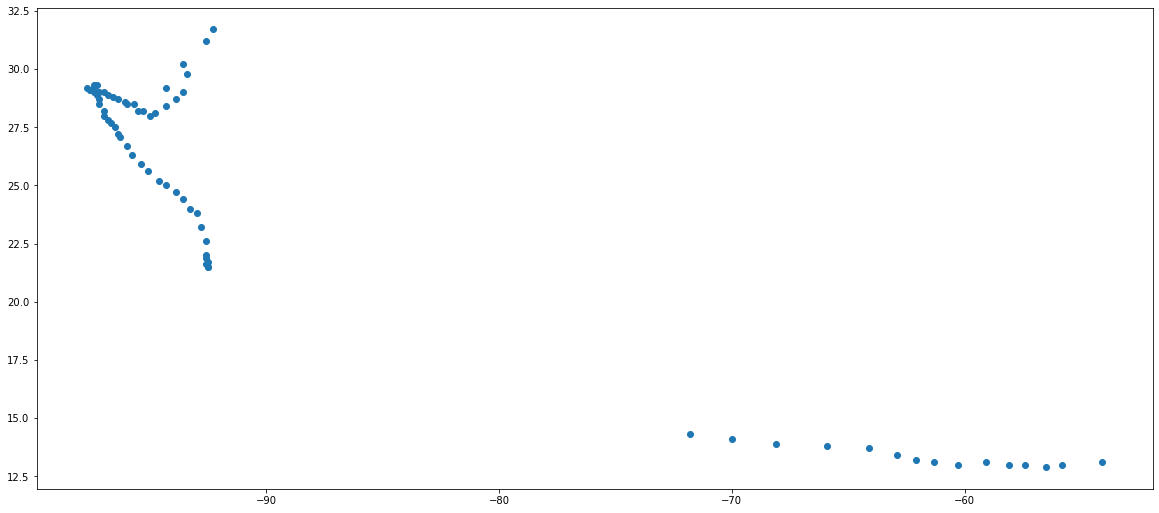

In [62]:
#simple plot of Harvey:
harvey.plot(figsize=(20,10));

#### Because this dataframe only have coordinates information (location) of hurricanes at each time point, we can only plot the position on a blank map. So, the next step is plotting the hurricane position on the US map to see where it hit and how strong it was at that time. To do so, the US map coordinates will be used as the base and plotting hurricanes position on top of it.

In [35]:
country = geopandas.read_file("C:/Users/Mozhdeh/Downloads/gz_2010_us_040_00_5m.json")
country.head()
#data: https://eric.clst.org/tech/usgeojson/

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


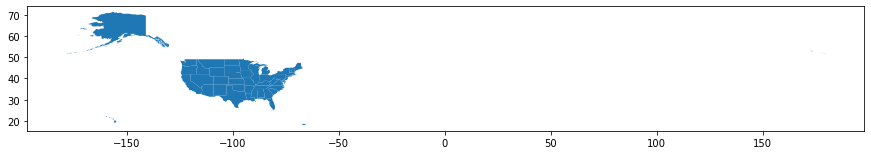

In [36]:
country.plot(figsize=(15,10))

#### As you see, the map is relatively small compared to the frame. It's because the information includes Alaska, Hawaii and Puerto Rico, which spread out around. Here we can exclude Alaska and Hawaii as the hurricane did not go anywhere near those two states. You can also add the figure size and color to customize your own plot:

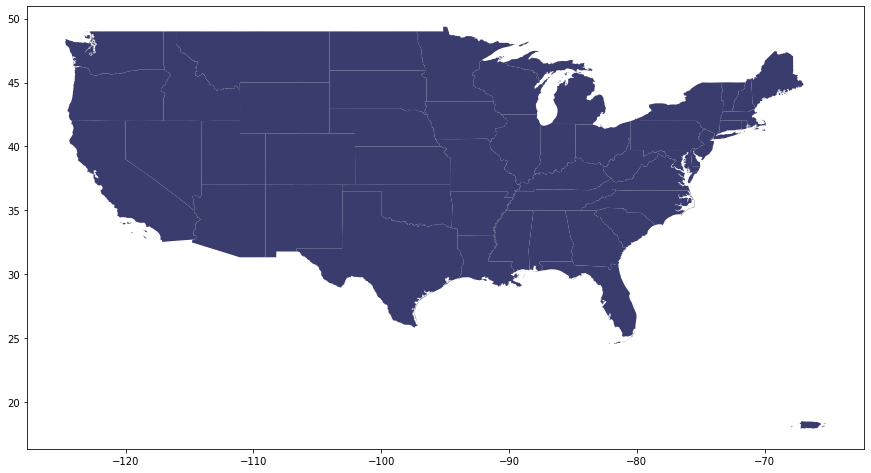

In [37]:
# Removing Alaska and Hawaii:
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(15,10), color='#3B3C6E');

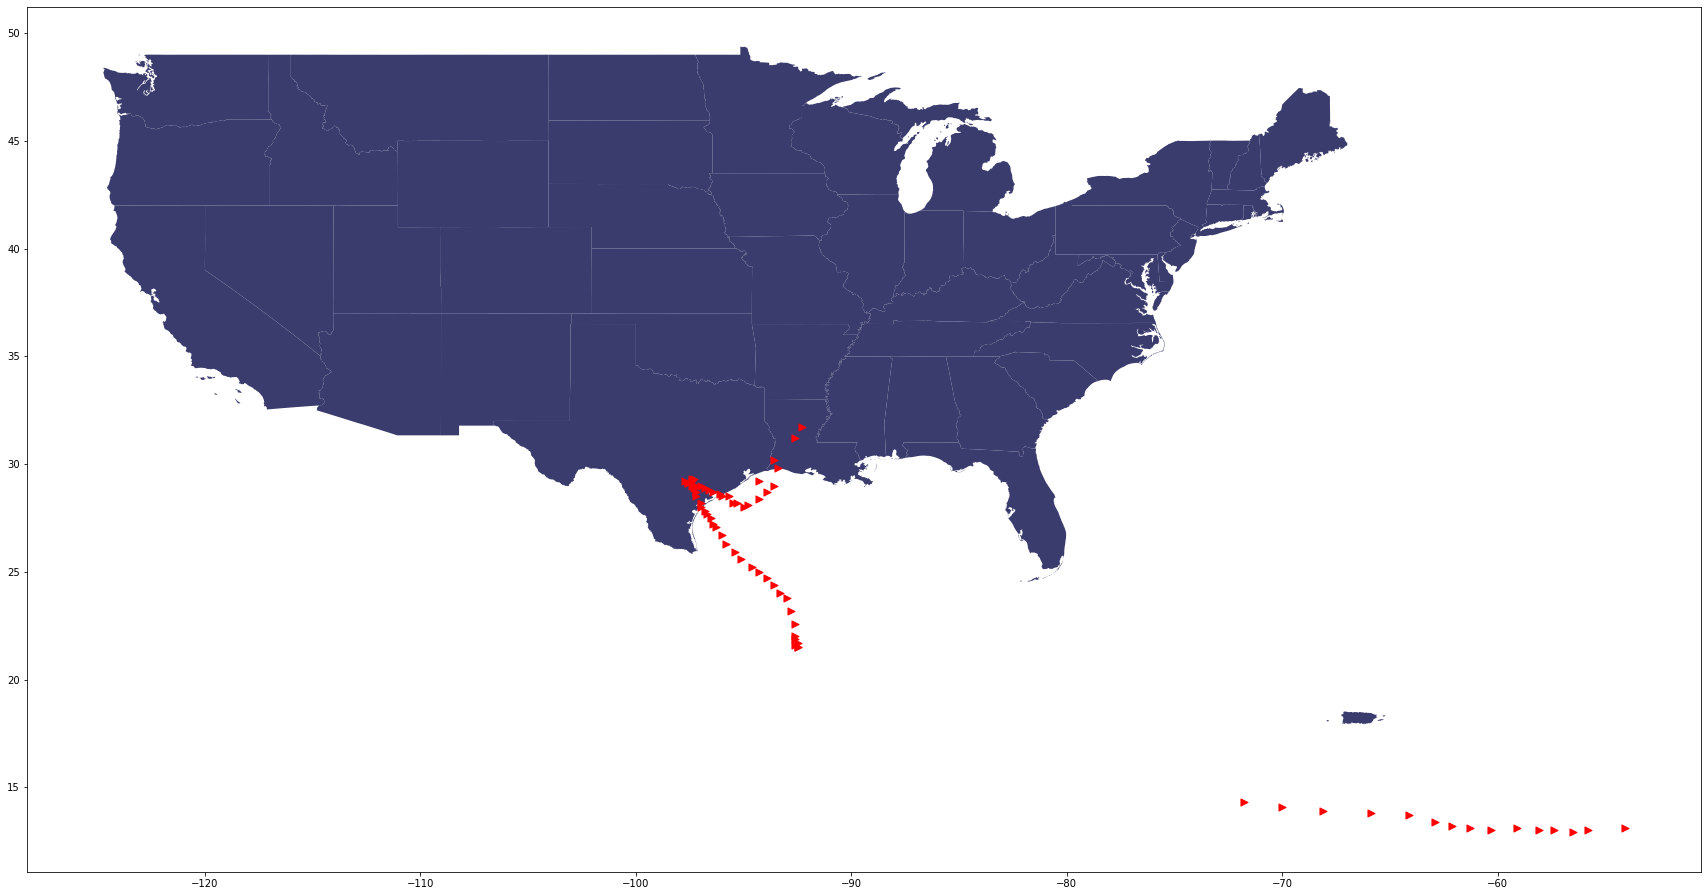

In [39]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
harvey.plot(ax=base, color='red', marker=">", markersize=50);

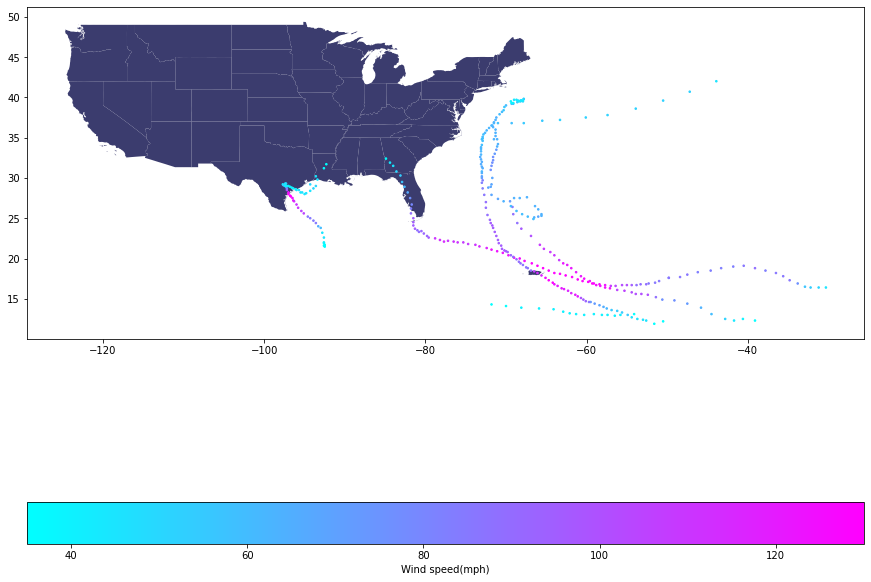

In [61]:
# Plotting the hurricane over the US map:

fig, ax = plt.subplots(1, figsize=(15,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')


harvey.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool', label="Wind speed(mph)", legend=True,
        legend_kwds={'label': "Wind speed(mph)",
                     'orientation': "horizontal"})
irma.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool')
jose.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool')
maria.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool')

# Harvey hurricane

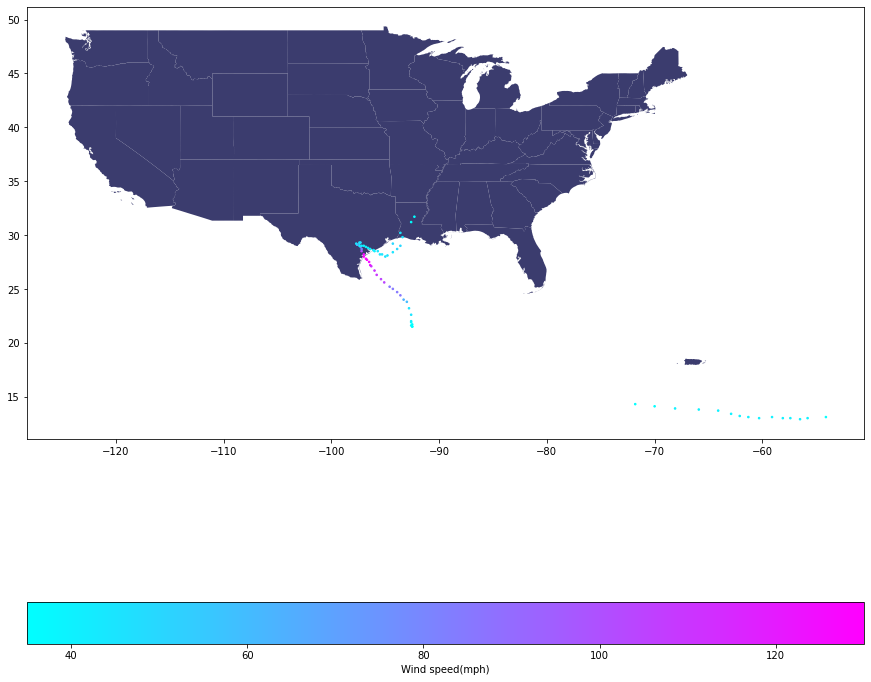

In [63]:
fig, ax = plt.subplots(1, figsize=(15,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')


harvey.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool', label="Wind speed(mph)", legend=True,
        legend_kwds={'label': "Wind speed(mph)",
                     'orientation': "horizontal"})

#### Hurricane Harvey was a Category 4 hurricane that made landfall on Texas and Louisiana in August 2017, causing catastrophic flooding and many deaths.

# Irma hurricane

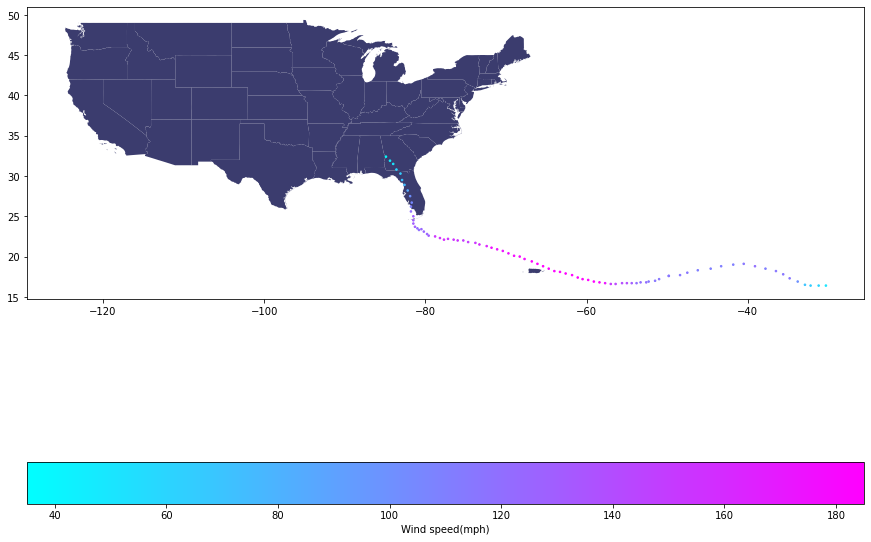

In [64]:
fig, ax = plt.subplots(1, figsize=(15,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')


irma.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool', label="Wind speed(mph)", legend=True,
        legend_kwds={'label': "Wind speed(mph)",
                     'orientation': "horizontal"})

#### Irma was the strongest storm on record in the Atlantic — excluding the Caribbean and Gulf of Mexico — with maximum winds of 185 mph and an unofficial wind gust of 199 mph. 

# Jose hurricane

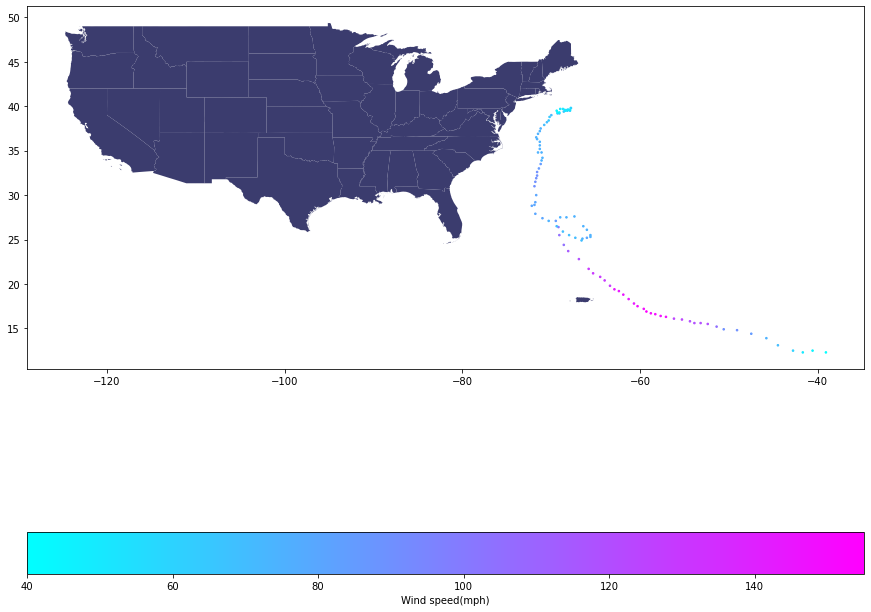

In [65]:
fig, ax = plt.subplots(1, figsize=(15,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')


jose.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool', label="Wind speed(mph)", legend=True,
        legend_kwds={'label': "Wind speed(mph)",
                     'orientation': "horizontal"})

#### Jose was the tenth named storm, fifth hurricane, and third major hurricane of the 2017 Atlantic hurricane season.

# Maria hurricane

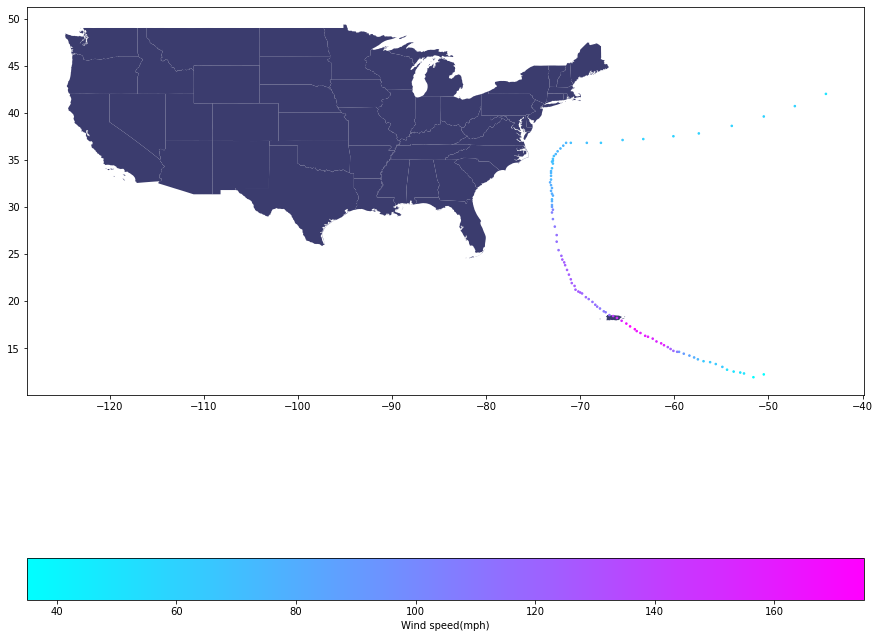

In [66]:
fig, ax = plt.subplots(1, figsize=(15,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')


maria.plot(ax=ax, column='Wind', marker=".", markersize=10, cmap='cool', label="Wind speed(mph)", legend=True,
        legend_kwds={'label': "Wind speed(mph)",
                     'orientation': "horizontal"})

#### Maria was the worst natural disaster in Puerto Rico's history, leaving potentially hundreds dead. 

# Conclusion

By plotting the hurricane position on the US map, we see that the hurricanes are strongest when they are offshore near the east coast. Only some of them approached the land and they started losing their strength. But at the wind speed in range 60 to 80 miles per hour, it can still make horrible damages.

* The three big hurricanes of 2017 — Harvey, Irma and Maria — are now three of the five costliest hurricanes in U.S. history, the National Oceanic and Atmospheric Administration (NOAA) announced on Dec 2019.
* The storms brought widespread death and destruction to Texas, Florida, Puerto Rico and the U.S. Virgin Islands.
* Both Irma and Maria soared to Category 5 strength, the top of the Saffir-Simpson scale of hurricane intensity. Irma’s landfall on Barbuda and Maria's landfall on Dominica makes 2017 only the second season on record to feature two hurricanes that hit at Category 5 strength.

* The 2017 Atlantic hurricane season was also the first season since records began in 1851 to have two Category 4 hurricanes make continental U.S. landfall in the same year (Harvey and Irma), according to Klotzbach.
https://eu.usatoday.com/story/weather/2018/01/30/2017-s-three-monster-hurricanes-harvey-irma-and-maria-among-five-costliest-ever/1078930001/